# Расчет бета - коэффициента акции

## Описание:

Бета - коэффициент является индикатором степени риска той или иной акции и показывает, на сколько процентов изменится стоимость акции при изменении рыночного индекса на один процент.

В данном упражнении проведем расчет бета коэффициента на примере котировок обыкновенных акции Сбербанка и индекса Московской биржи.

К-т рассчитан двумя способами. Результаты ниже.

## Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_theme()

## Зададим константы

#### наименования столбцов в импортируемом файле

In [3]:
COLUMNS = ['TICKER', 'PER', 'DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']

#### год, выбранный в качестве базы для расчета

In [4]:
YEAR = '2021'

## Зададим пользовательскте функции

#### Функция парсинга и предобработки файла

In [5]:
def parse_and_preprocess(path):
    data = pd.read_csv(path)
    data.columns = COLUMNS
    data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y%m%d')
    data.sort_values(by = 'DATE', inplace=True)
    data.set_index('DATE', drop = True, inplace=True)
    return data

#### Функция первичного обзора файла

In [6]:
def init_observ(data):
    print('Выведем датафрейм на экран:')
    display(data)
    print('Сводная информация по датафрейму:')
    data.info()
    print('Проверим наличие пропусков данных:')
    print(data.isna().sum())
    print('Распечатаем график цен закрытия:')
    data['CLOSE'].plot(figsize = (15, 9))
    plt.show()

## Загрузка и обзор данных

### Индекс Московской биржи

#### Загрузка

In [7]:
moex = parse_and_preprocess('IMOEX_200101_230308.csv')

In [8]:
moex = moex[YEAR: YEAR]

#### Обзор

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2021-01-04,IMOEX,D,0,3304.75,3350.81,3304.17,3350.51,66835524820
2021-01-05,IMOEX,D,0,3326.06,3365.32,3301.88,3359.15,71655035538
2021-01-06,IMOEX,D,0,3375.91,3380.63,3344.43,3371.03,71374633095
2021-01-08,IMOEX,D,0,3399.23,3474.66,3397.15,3454.82,131904843837
2021-01-11,IMOEX,D,0,3449.91,3516.90,3436.66,3482.48,143248254278
...,...,...,...,...,...,...,...,...
2021-12-24,IMOEX,D,0,3698.09,3702.72,3654.17,3702.72,44313579092
2021-12-27,IMOEX,D,0,3713.25,3741.79,3710.04,3740.63,48803438344
2021-12-28,IMOEX,D,0,3768.40,3790.14,3751.37,3777.56,63514063658


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  255 non-null    object 
 1   PER     255 non-null    object 
 2   TIME    255 non-null    int64  
 3   OPEN    255 non-null    float64
 4   HIGH    255 non-null    float64
 5   LOW     255 non-null    float64
 6   CLOSE   255 non-null    float64
 7   VOL     255 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.9+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


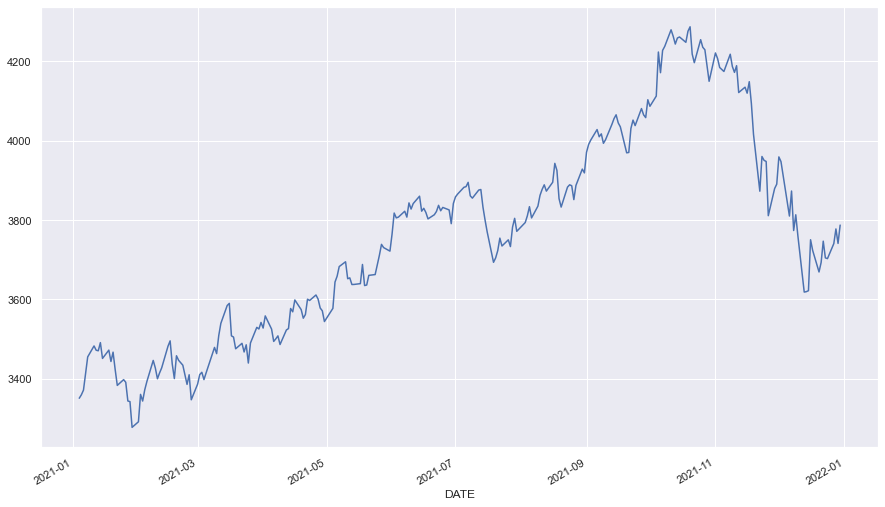

In [9]:
init_observ(moex)

### Сбербанк ао

#### Загрузка

In [10]:
sbrf = parse_and_preprocess('SBER_200101_230308.csv')

In [11]:
sbrf = sbrf[YEAR: YEAR]

#### Обзор датафрейма

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2021-01-04,SBER,D,0,274.67,276.60,270.61,272.00,48799460
2021-01-05,SBER,D,0,272.67,275.70,270.28,275.20,45554100
2021-01-06,SBER,D,0,275.90,275.92,271.62,272.93,40905340
2021-01-08,SBER,D,0,275.11,283.99,275.11,283.64,88672940
2021-01-11,SBER,D,0,282.75,292.95,279.48,289.49,112210400
...,...,...,...,...,...,...,...,...
2021-12-24,SBER,D,0,293.00,294.18,289.00,293.89,37669750
2021-12-27,SBER,D,0,294.79,296.00,293.37,295.68,35728530
2021-12-28,SBER,D,0,295.84,297.55,294.18,295.00,37853360


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-01-04 to 2021-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  255 non-null    object 
 1   PER     255 non-null    object 
 2   TIME    255 non-null    int64  
 3   OPEN    255 non-null    float64
 4   HIGH    255 non-null    float64
 5   LOW     255 non-null    float64
 6   CLOSE   255 non-null    float64
 7   VOL     255 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.9+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


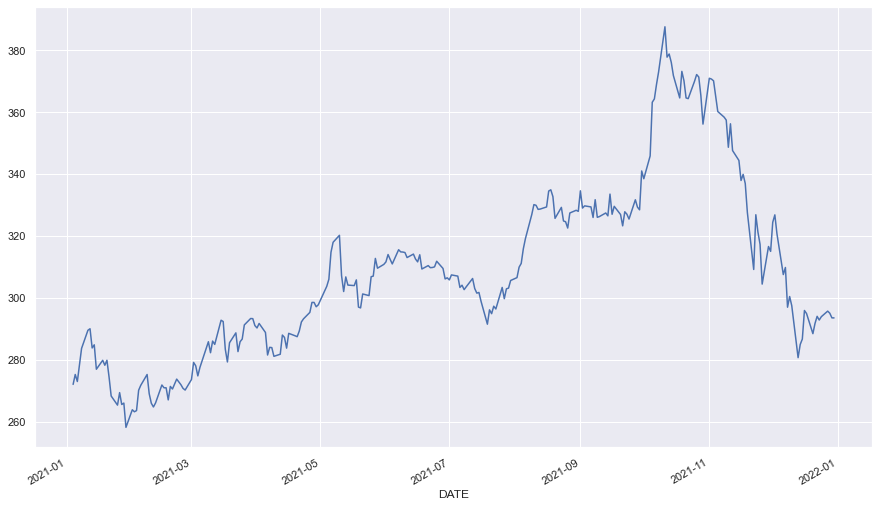

In [12]:
init_observ(sbrf)

## Расчет

#### расчет дневных доходностей индекса и акции.

In [13]:
moex['returns'] = moex['CLOSE'].pct_change()

In [14]:
sbrf['returns'] = sbrf['CLOSE'].pct_change()

#### оставим данные только за те дни, за которые имеются котировки и по индексу и по акции.

In [15]:
moex = moex.dropna()

In [16]:
sbrf = sbrf.dropna()

In [17]:
moex, sbrf = moex.align(sbrf, join = 'inner', axis = 0)

#### Первый подход.
Рассчитаем бета - коэффициент как отношение ковариации доходностей акции и индекса к дисперсии доходностей индекса.

In [18]:
covariance = sbrf['returns'].cov(moex['returns'])

In [19]:
print('К-т ковариации: {:.6f}'.format(covariance))

К-т ковариации: 0.000124


In [20]:
beta = covariance / moex['returns'].var()

In [21]:
print('Бета ао Сбербанк: {:.4f}'.format(beta))

Бета ао Сбербанк: 1.1785


#### Второй подход.
Рассчитаем бета - коэффициент как к-т линейной регрессии доходностей акции к доходности индекса.

In [22]:
lm = LinearRegression()

In [23]:
x = moex[['returns']]

In [24]:
y = sbrf[['returns']]

In [25]:
lm.fit(x, y)

LinearRegression()

In [26]:
print('Бета ао Сбербанк: {:.4f}'.format((lm.coef_)[0][0]))

Бета ао Сбербанк: 1.1785


## Выводы:

Полученное значение бета - коэффициента указывает, что доходности Сбербанка ао во-первых коррелированы с доходностями индекса, во-вторых, одному проценту изменения доходности индекса в среднем соответствует изменение доходности акции на 1.1785 процента.